Trabalho - Segmentação de Imagens

In [1]:
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import numpy as np
from skimage.io import imread,imsave, imread_collection
import matplotlib.pyplot as plt
import glob as glob
from skimage.filters import sobel, prewitt
from skimage.filters import (threshold_otsu, threshold_niblack)

1.	Utilizando a base de imagens “ultrassound.zip” disponibilizada no SIGAA, realize a segmentação das imagens das seguintes formas: 

Carregando a base de dados "ultrassound.zip" as imagens da pasta Cropped e colocando-as em níveis de cinza.

In [2]:
base = imread_collection('cropped/*')
imageS = []
for i in base:
    img = rgb2gray(i)
    imageS.append(img)


In [3]:
##def plot(imagens, color = 'gray'):
   ## if len(imagens) == 1:
        ##plt.imshow(imagens[0], color)
   ## else:    
##fig, ax = plt.subplots(1, len(imagens), figsize=(15, 20))
     ##   for k, x in enumerate(imagens):        
        ##    ax[k].imshow(x, cmap = color)
        ##    ax[k].set_title("Imagem " + str(k))
  ##  plt.show()

I.Aplique o algoritmo K-means utilizando os pixels como pesos, após isso utilize algum detector de borda (à sua escolha); 
Detector de borda escolhido foi o Sobel.


In [19]:
#A função que realiza o algortimo K-means utilizando 2 clusters 
def make_kmeans(img):
    k_means = KMeans(n_clusters = 2).fit(img.reshape((-1,1)))
    clusters = k_means.labels_
    return clusters.reshape(img.shape)

Resultados do algortimo Kmeans

In [20]:
resultado = []
for i in imageS:
    resultado.append(make_kmeans(i))

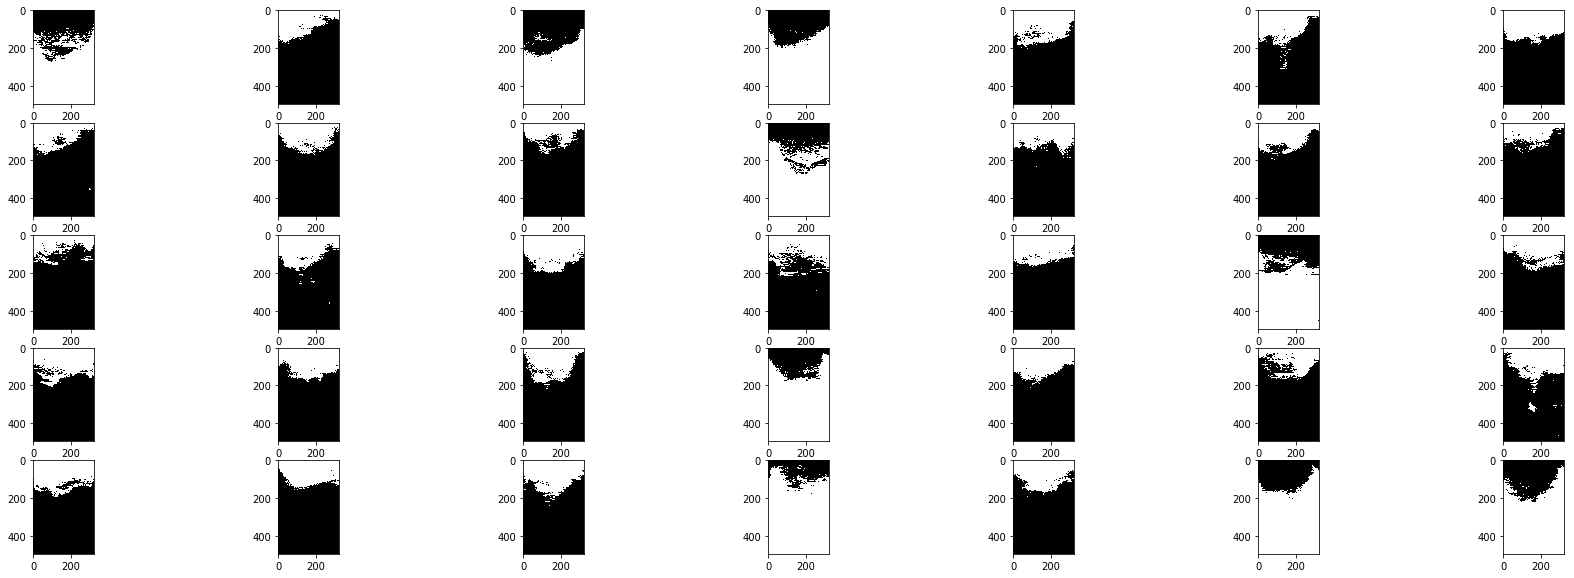

In [21]:
quant = [5,7]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(resultado[cont],cmap='gray')
        cont += 1


Resultados do algortimo Kmeans com o detector de borda de Sobel

In [22]:
borda_sobel = []
for i in resultado:
    img = sobel(i)
    borda_sobel.append(img)


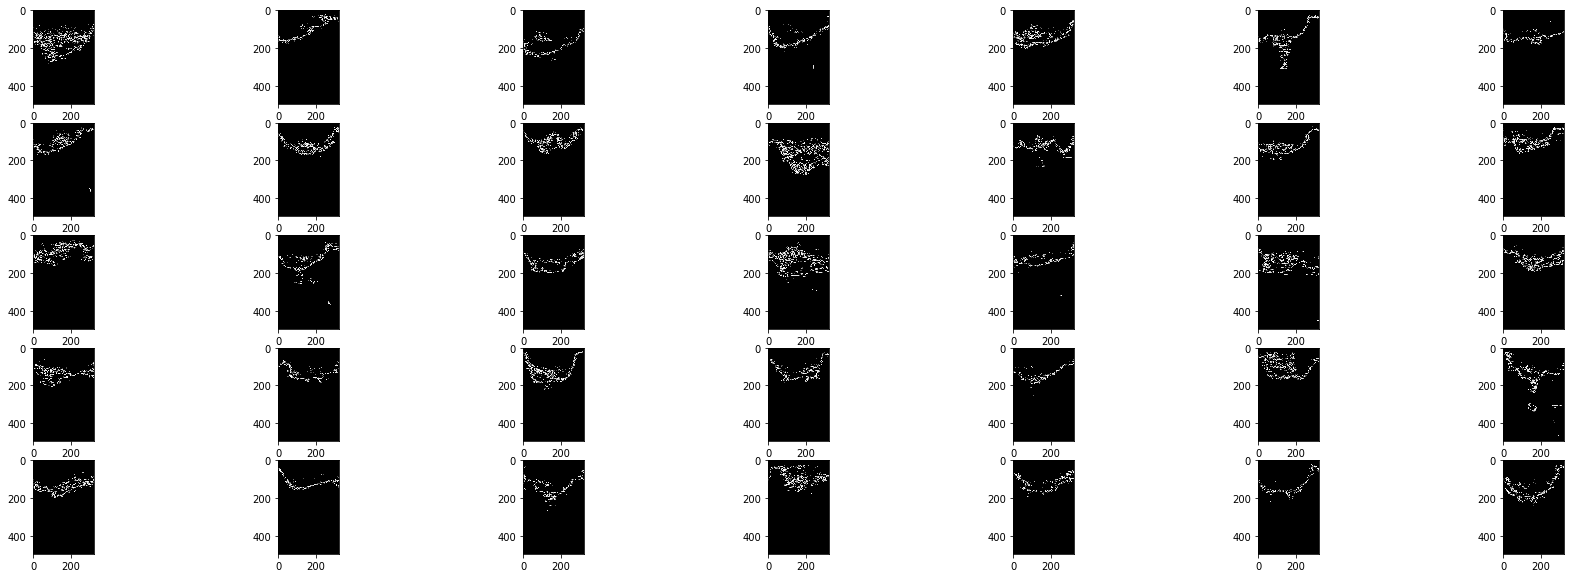

In [23]:
quant = [5,7]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(borda_sobel[cont],cmap='gray')
        cont += 1

In [ ]:
#fill = binary_fill_holes(borda_sobel)
#plt.imshow(fill,cmap='gray')

In [ ]:
#(resultado == 3)

In [ ]:
#def labels(img):
  #  return np.unique(img)

II.	Implemente duas segmentações utilizando os algoritmos de binarização local e global (Niblack e Otsu, respectivamente), após isso utilize dois métodos de detecção de bordas por gradiente;

Imagens o Limiar de Otsu

In [24]:
final = []
for i in imageS:
        otsu = threshold_otsu(i)
        imagemotsu = i < otsu
        final.append(imagemotsu) 
    
    

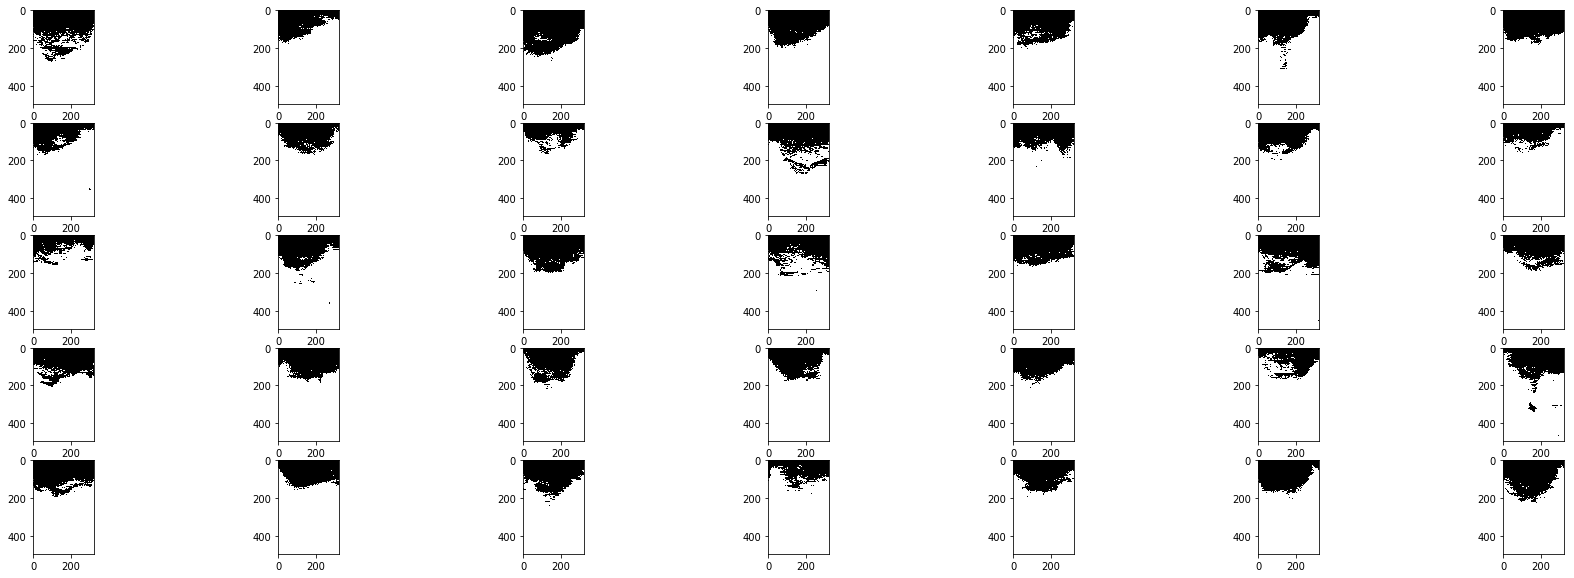

In [25]:
quant = [5,7]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(final[cont],cmap='gray')
        cont += 1

Imagens com Limiar de Niblack

In [26]:
finalni = []

window_size = 25
for i in imageS:
        niblack = threshold_niblack(i, window_size=window_size, k=0.8)
        imagemniblack = i > niblack
        finalni.append(imagemniblack)




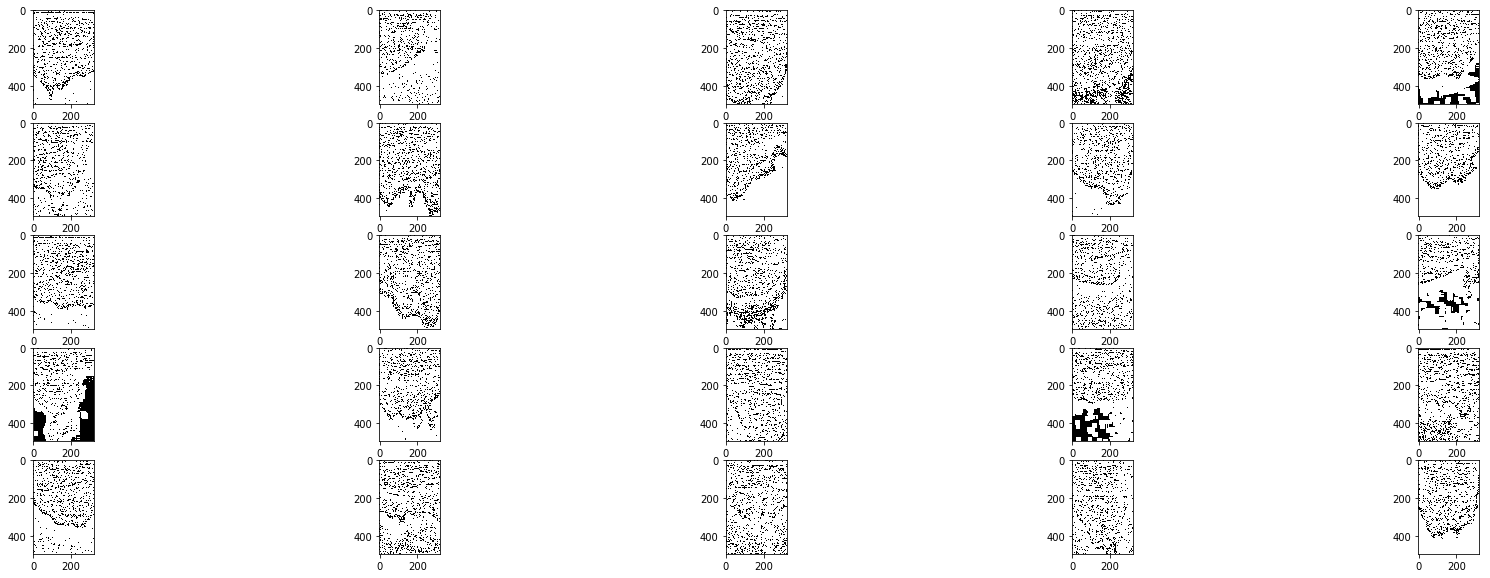

In [22]:
quant = [5,5]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(finalni[cont],cmap='gray')
        cont += 1

Imagens do limiar de Otsu com o detector de Sobel

In [27]:
finalsobelotsu = []
for i in final:
        imageotsu = sobel(i)
        finalsobelotsu.append(imageotsu)


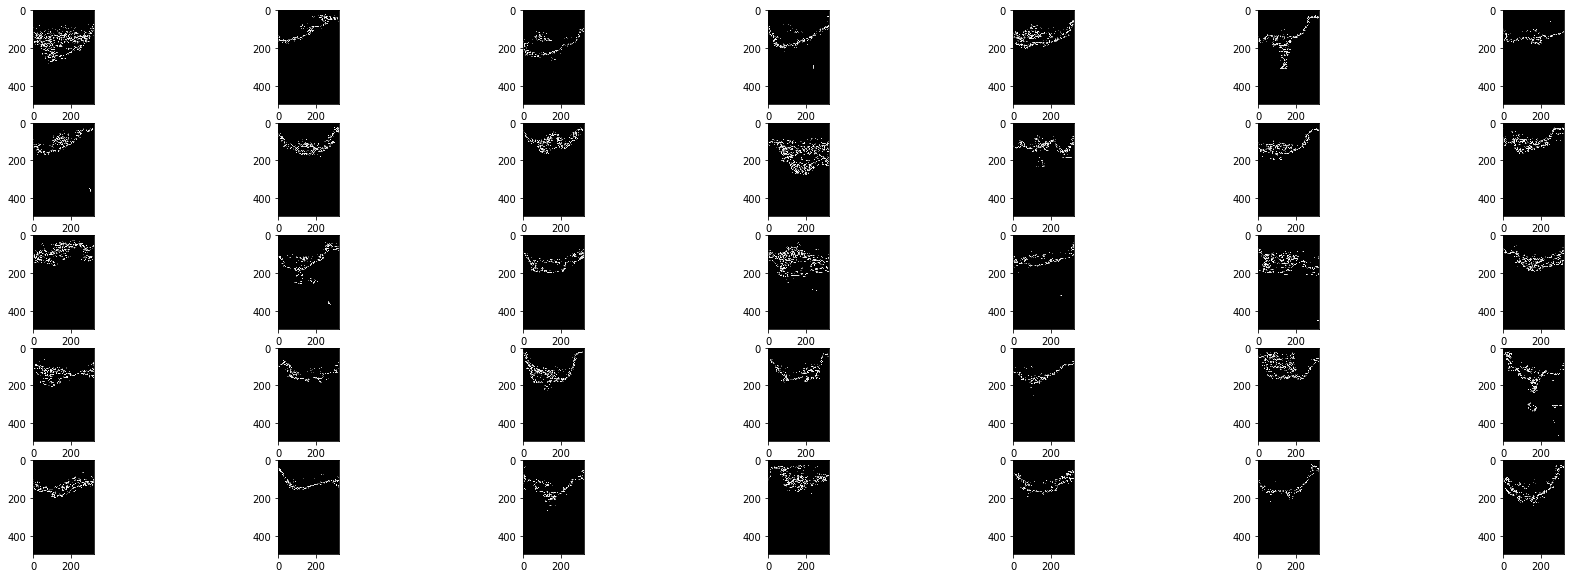

In [24]:
quant = [5,7]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(finalsobelotsu[cont],cmap='gray')
        cont += 1

Imagens com o Limiar de Niblack com o detector Prewwit

In [28]:
finalniblackprewwit = []
for i in finalni:
        imageni = prewitt(i)
        finalniblackprewwit.append(imageni)


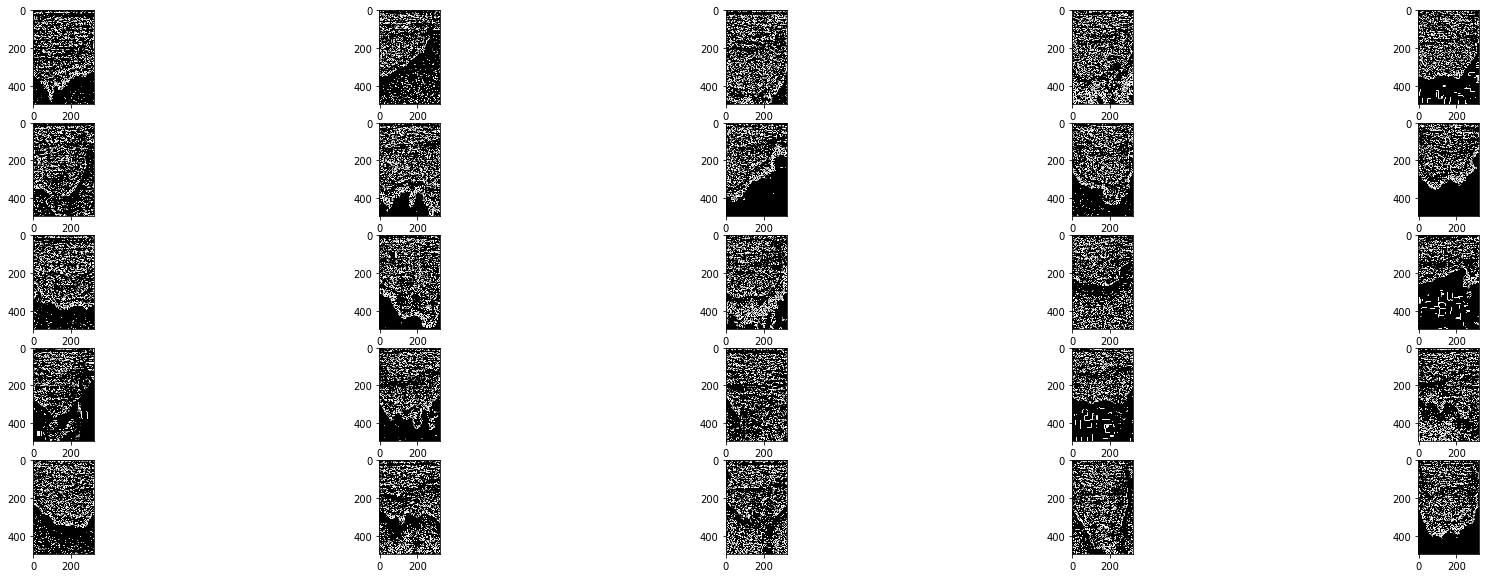

In [26]:
quant = [5,5]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,10))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(finalniblackprewwit[cont],cmap='gray')
        cont += 1

In [ ]:
# Então é perceptivel que apos alicar o limiar de otsu, podemos perceber que a facilidade na detecção de bordas e
# outras imperfeições presentes na imagem foram indentificadas com maior clareza então dependendo do que você deseja
# a aplicação do limiar pode ser eficiente para poder obter resultados plausiveis.

III.	Realize a detecção de bordas utilizando o método de Marr-Hildreth. Explique quais as vantagens do método utilizado em relação aos métodos baseados em gradiente; 

In [68]:
def get_edges_Marr_Hildreth(img, sigma=1.25):
    """
    Finds the edges using Marr-Hildreth edge detection method.
      Parameters:
        - img : input image
        - sigma : sigma is the std-deviation and refers to the spread of gaussian
      Returns:
        - an edge-filtered image (the locations of the zero-crossings)
    
    Adapted from: https://github.com/adl1995/edge-detectors/blob/master/marr-hildreth-edge.py
    
    """
    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))
    
    normal = 1 / (2.0 * np.pi * sigma**2)
    # Kernel is the Laplacian of the Gaussian
    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal # LoG filter

    kern_size = kernel.shape[0]
    
    log = np.zeros_like(img, dtype=float)

    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            # Convolve each local image window with the Gaussian kernel
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i,j] = np.sum(window)
            
    log = log.astype(np.int64, copy=False)

    
    
    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] > 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255 # Set to white wherever there's a zero-crossing.
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255 

    #plotting images
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,3,1);
    plt.imshow(img, cmap='gray');
    plt.title('Original'); plt.axis('off');
    
    plt.subplot(1,3,2)
    imgplot = plt.imshow(log, cmap='gray')
    plt.title('Laplacian of Gaussian'); plt.axis('off')
    
    plt.subplot(1,3,3)
    imgplot = plt.imshow(zero_crossing, cmap='gray')
    plt.title('Zero Crossing sigma = ' + str(sigma)); plt.axis('off')
    plt.show()
    
    return zero_crossing

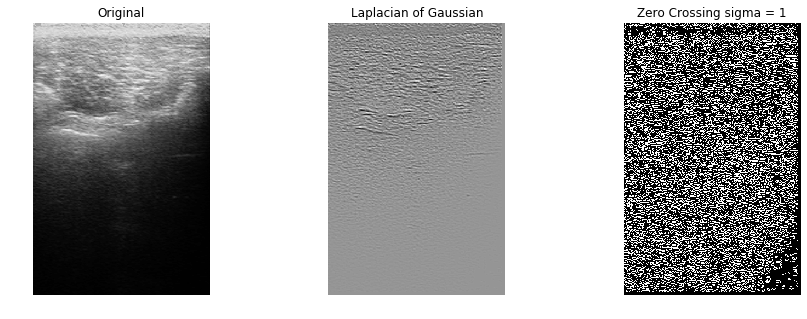

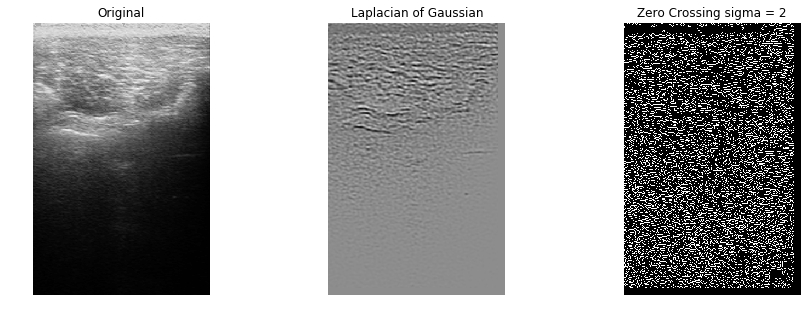

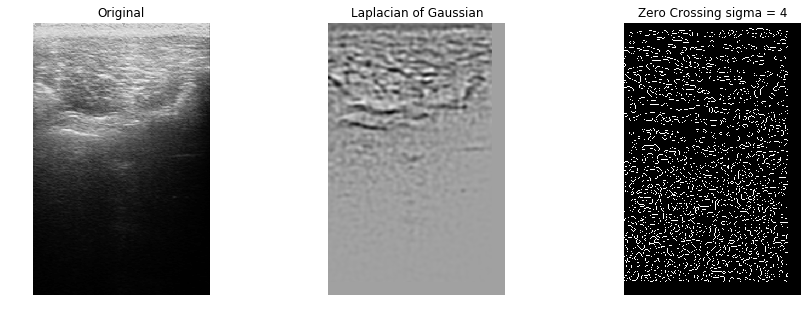

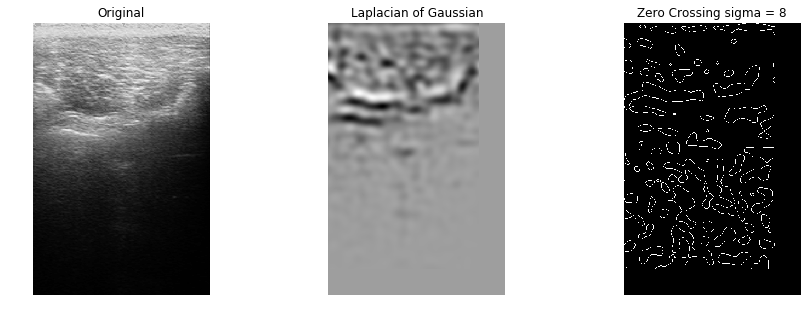

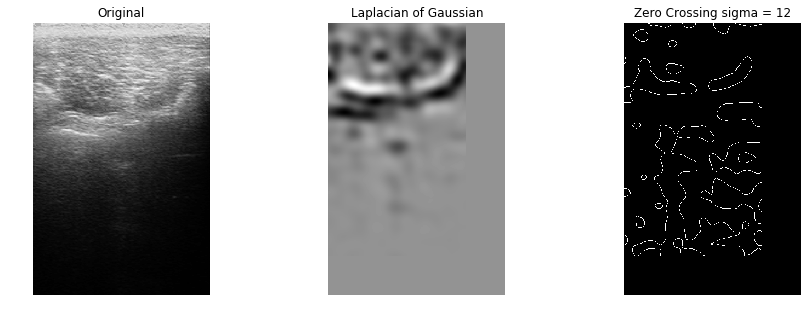

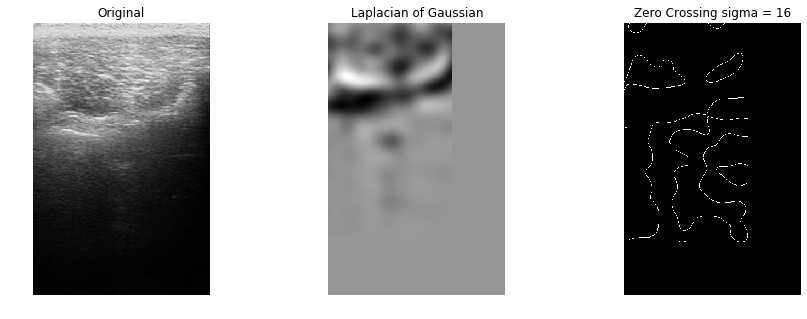

In [69]:
# Plot the Laplacians and the zero-crossings

sigmas = [1,2,4,8,12,16]

img = plt.imread('C:/Users/Camila Catiely/tópicos/ultrassound/cropped/516808004.bmp')[:,:,0]

for sigma in sigmas:
    b = get_edges_Marr_Hildreth(img, sigma=sigma)


A aplicação do método de Marr-Hildreth foi aplicado apenas em 1 imagem, com valores de sigmas diferentes e as vantagens de utilizar este método é porque ele oferece um cálculo chamado zero_crossing que permite formar contornos fechados, melhorando posteriormente a dettecção de bordas, e é um método que leva em conta fatores como ruído da
imagem e a natureza das próprias bordas.


In [70]:
#from scipy import ndimage
#result2 = []
#img8 = []
#img8 = imageS[0:8]

#for i in (img8):
 #   result2.append(edgesMarrHildreth(i,0.1))
 

IV.	Aplique outro algoritmo de agrupamento que utilize também a posição espacial dos pixels como peso. Após isso, utilize algum detector de borda (a sua escolha); 

In [4]:



from skimage.segmentation import felzenszwalb, slic



base = glob.glob('cropped/*.bmp')
slicimages = []
bordas = []

for i, img in enumerate(base):
    image = imread(img)
    resultslic = slic(image, n_segments=2, compactness=20, sigma=5)
    slicimages.append(resultslic)
    bordas.append(sobel(resultslic))

    
    

#segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
#segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)

#segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)

#print("Felzenszwalb's number of segments: %d" % len(np.unique(segments_fz)))
#print("Slic number of segments: %d" % len(np.unique(segments_slic)))
#print("Quickshift number of segments: %d" % len(np.unique(segments_quick)))

#fig, ax = plt.subplots(1, 3)
#fig.set_size_inches(8, 3, forward=True)
#fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

#ax[0].imshow(mark_boundaries(img, segments_fz))
#ax[0].set_title("Felzenszwalbs's method")
#ax[1].imshow(mark_boundaries(img, segments_slic))
#ax[1].set_title("SLIC")
#ax[2].imshow(mark_boundaries(img, segments_quick))
#ax[2].set_title("Quickshift")
#for a in ax:
 #   a.set_xticks(())
  #  a.set_yticks(())
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


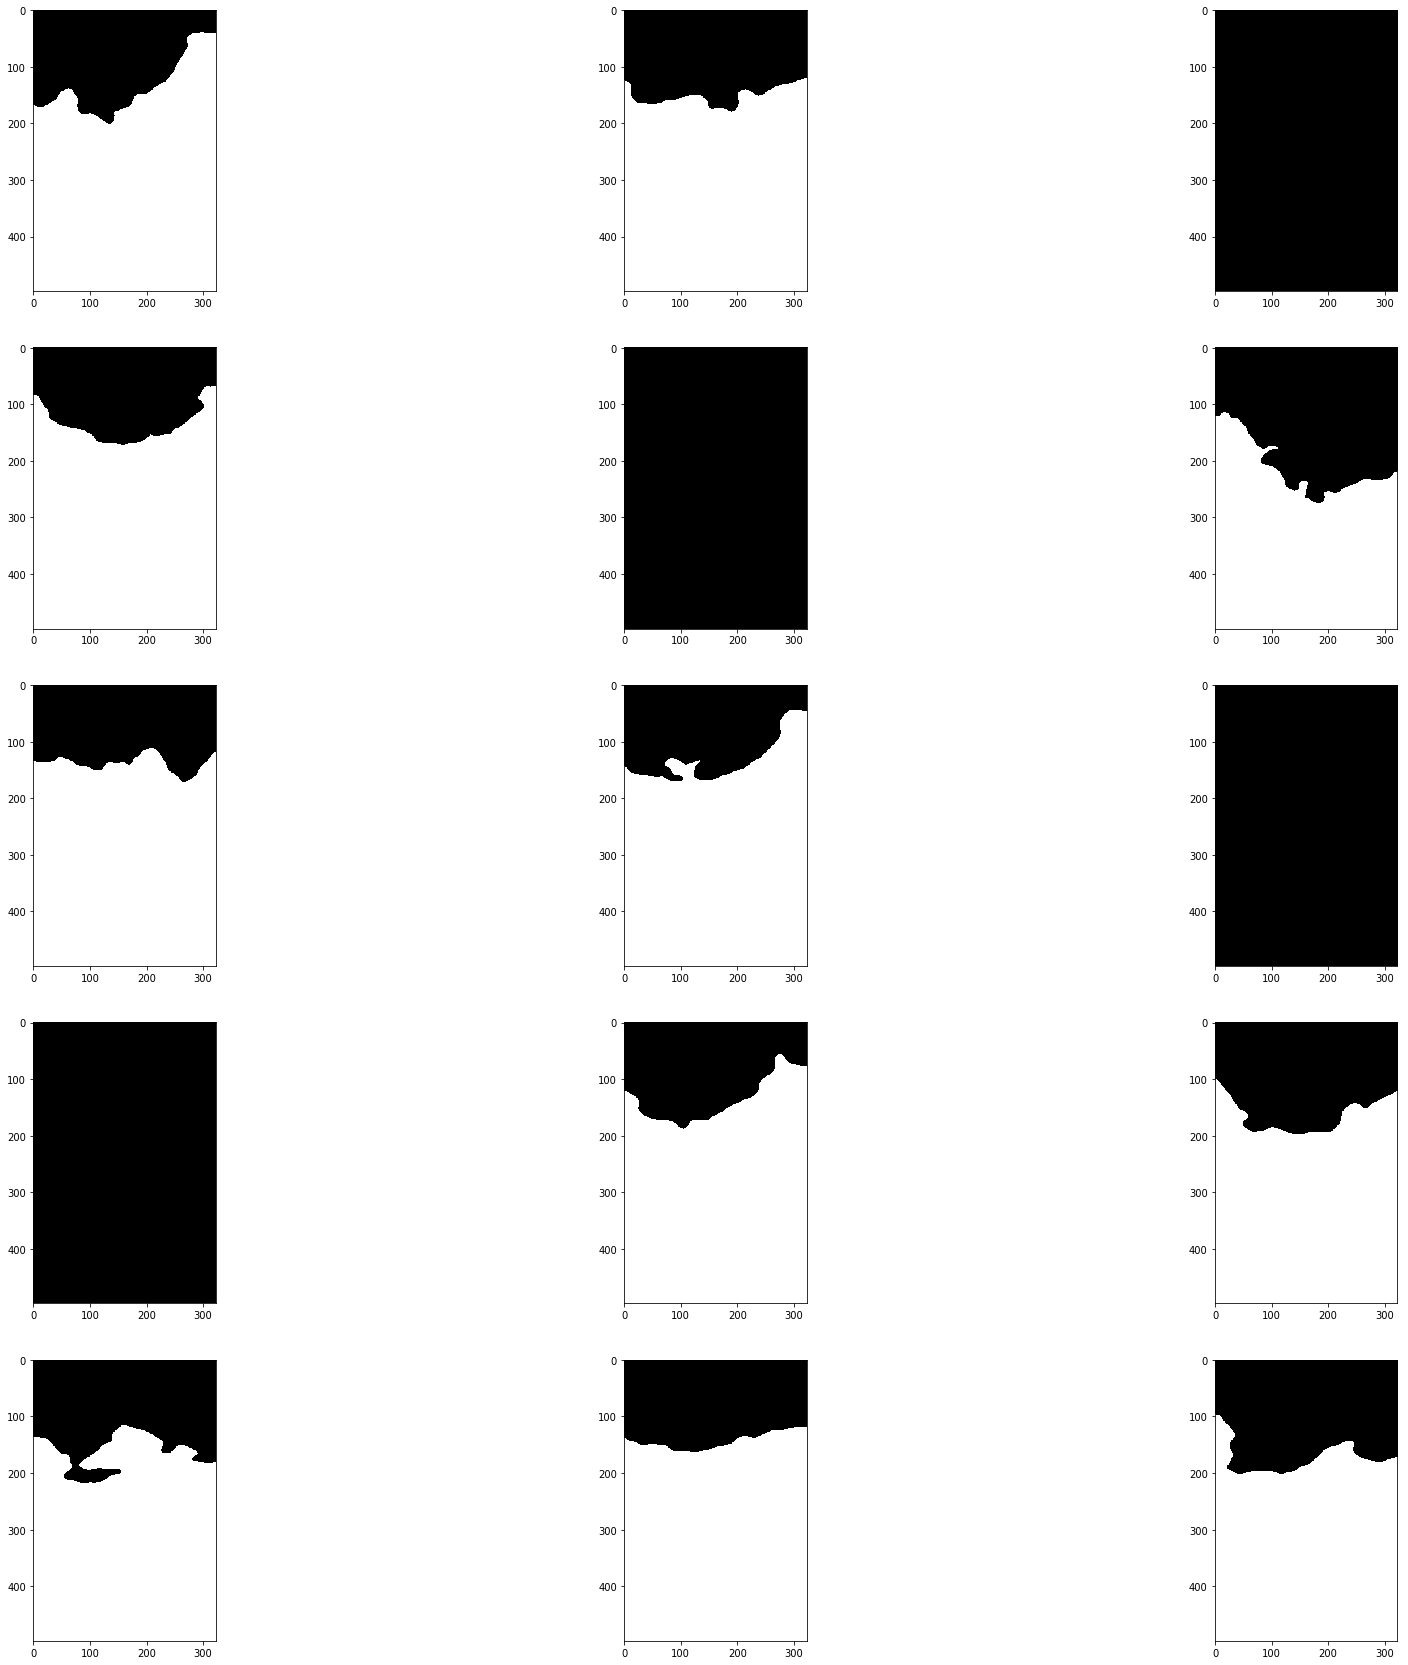

In [5]:
quant = [5,3]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,30))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(slicimages[cont],cmap='gray')
        cont += 1

Detector de borda Sobel aplicado encima do Slic

In [6]:
slicimagessobel = []
for i in slicimages:
    img2 = sobel(i)
    slicimagessobel.append(img2)

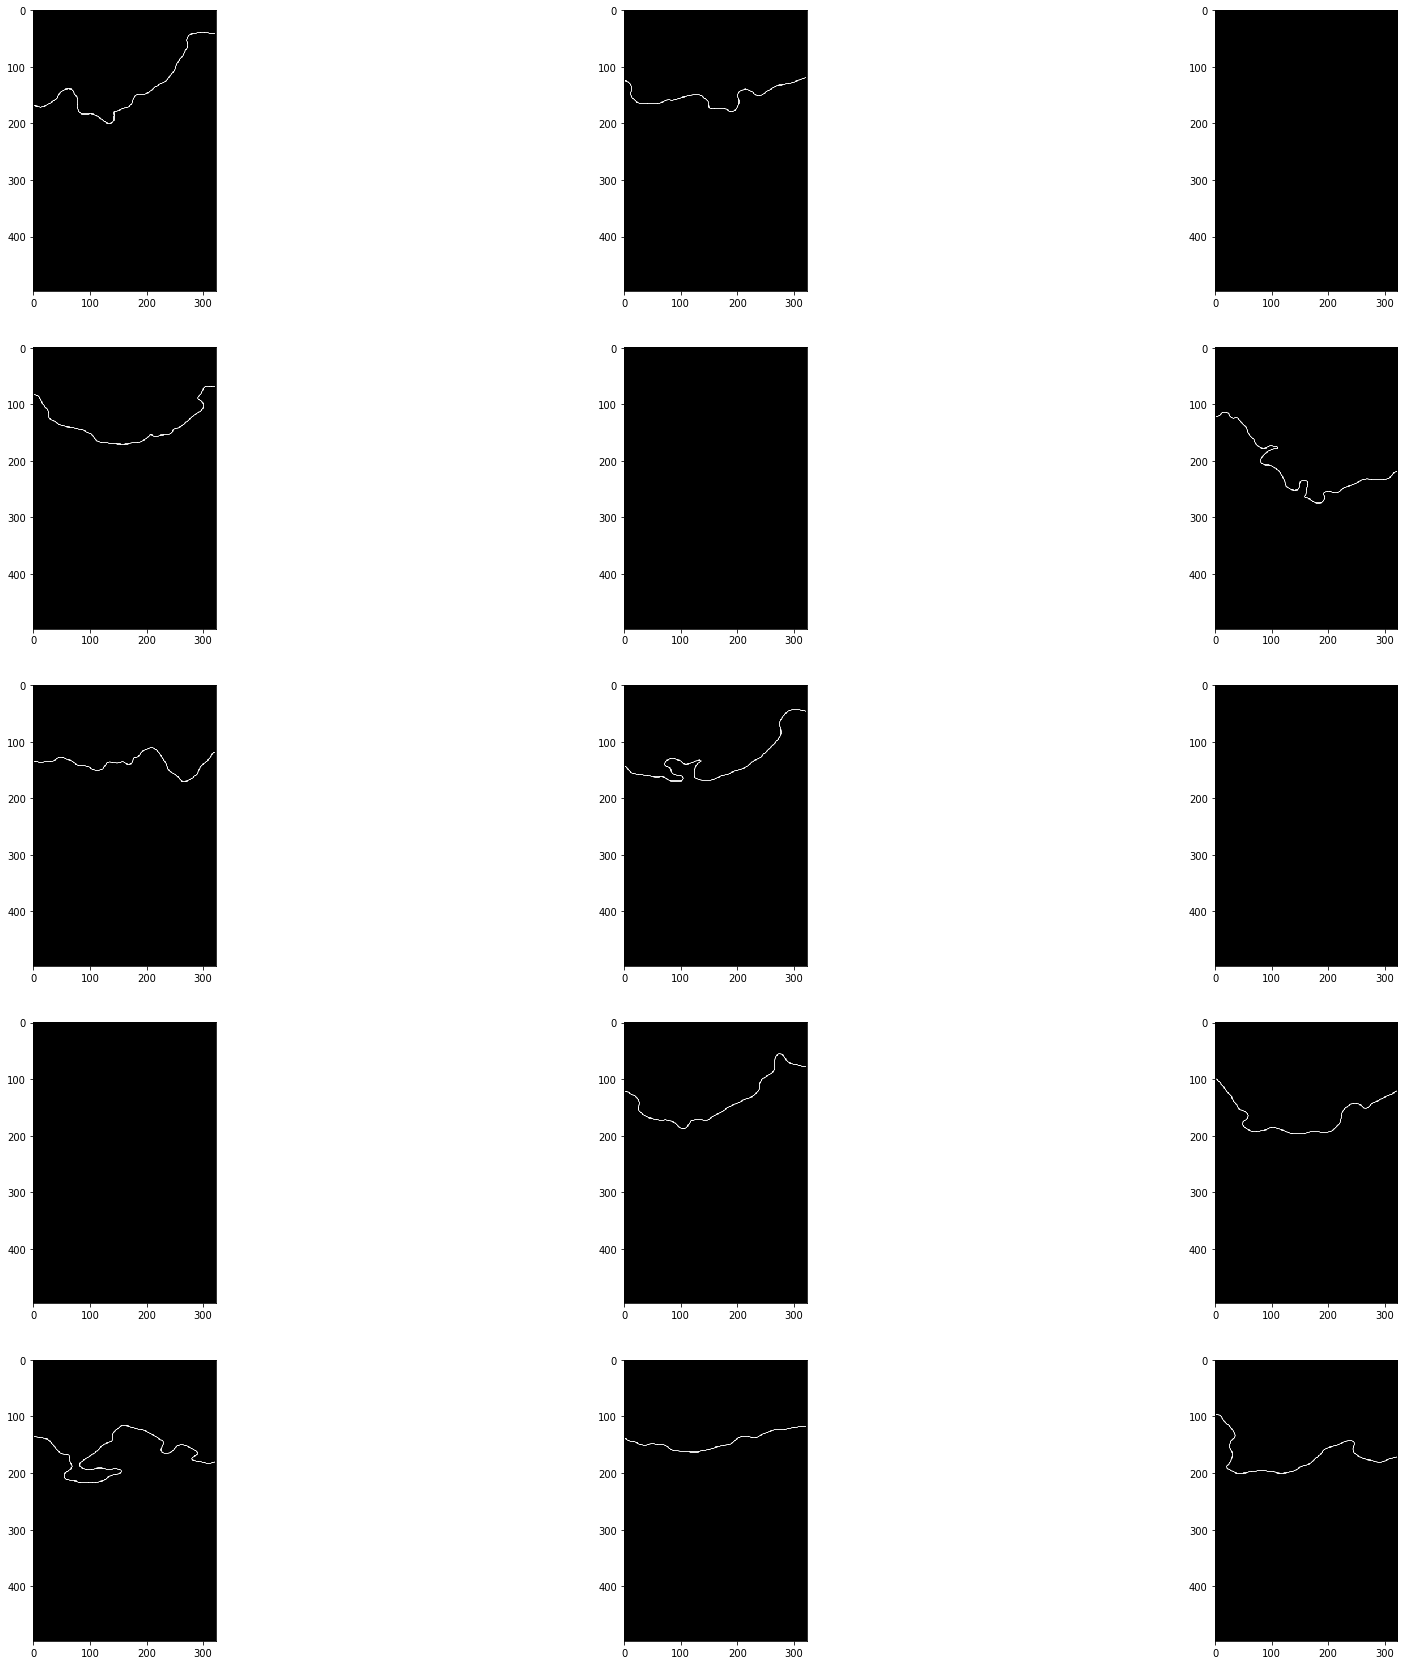

In [7]:
quant = [5,3]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,30))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(slicimagessobel[cont],cmap='gray')
        cont += 1

O método escolhido para o agrupamento utilizando os os pívels como pesos foi o SLIC que gera superpixels pelo algoritmo
SLIC. São calculados os valores médios de intensidade para cada um dos superpixels a
fim de gerar uma imagem de valor médio, do qual é extraída o objeto por meio de
um limiar adaptativo usando o método do triângulo. A partir disto os objetos são extraídos por um limiar local e é aplicada a remoção de outliers. Os outliers são dados que se diferenciam drasticamente dos demais dados, ou seja, é um valor aberrante,
que foge da normalidade. Por fim, é feito um particionamento dos superpixels e um refinamento do contorno dos objetos para a segmentação e assim o método se apresenta eficaz.

2.	Crie um método para escolher o foreground e o background automaticamente;



Foregroud e o Background calculados encima das imagens do Kmeans

In [55]:
foreback1 = []
foreback1 = limiar(resultado)

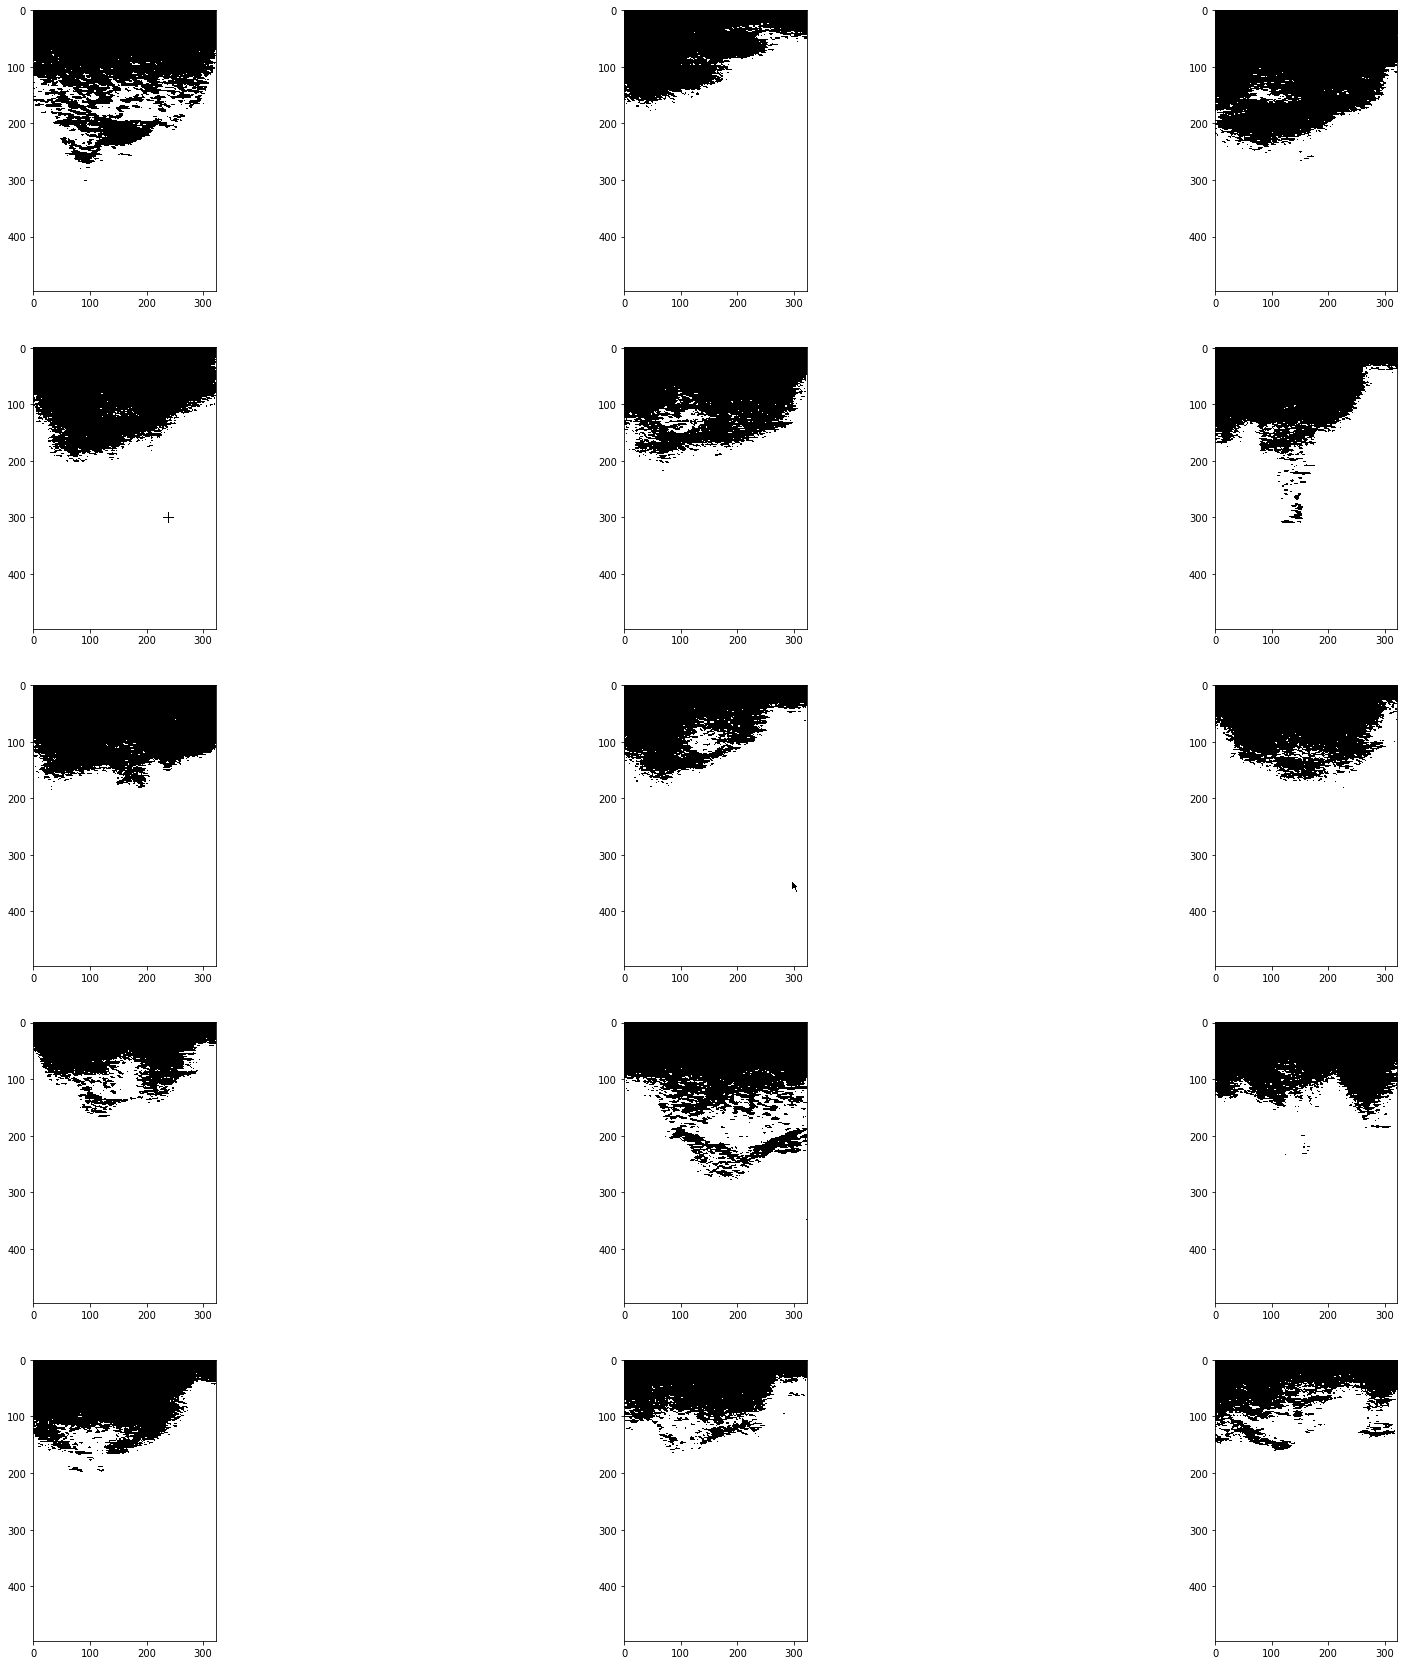

In [56]:
quant = [5,3]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,30))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(foreback1[cont],cmap='gray')
        cont += 1

Foregroud e o Background calculados encima das imagens do Slic

In [53]:
foreback = []
foreback = limiar(slicimages)

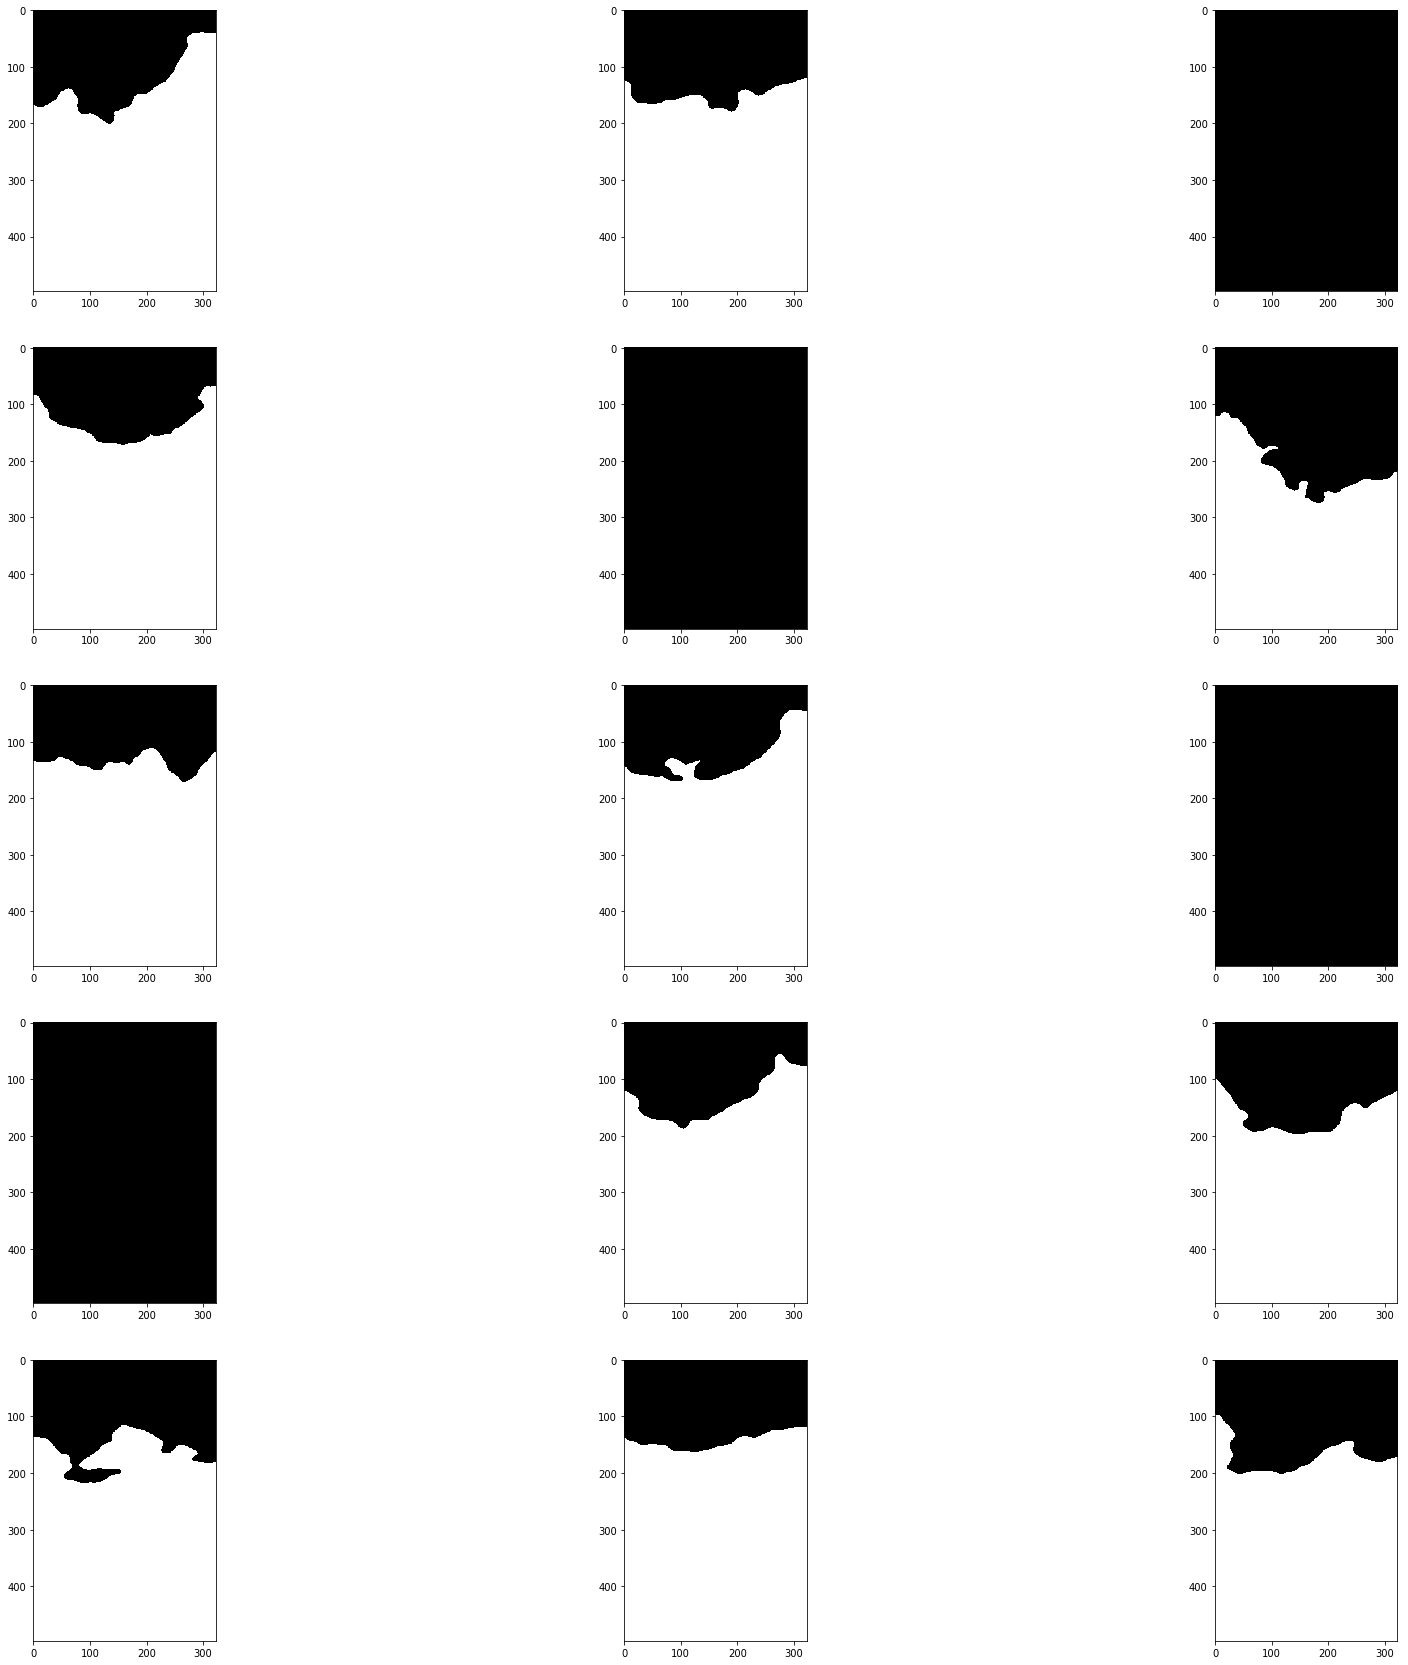

In [54]:
quant = [5,3]
fig, ax = plt.subplots(quant[0],quant[1],figsize=(30,30))
cont = 0
for i in range(quant[0]):
    for j in range(quant[1]):
        ax[i,j].imshow(foreback[cont],cmap='gray')
        cont += 1

In [52]:
def limiar(images):
    back = []
    for i, img in enumerate(images):
        obj = 0
        fundo = 0
        for i in range(img.shape[0]):
            for j  in range(img.shape[1]):
                if img[i,j] == 0:
                    fundo += 1
                else:
                    obj += 1
        if fundo < obj:
            back.append(img)
        else:
            np.place(img,img == 0, 255)
            back.append(img)
    return back
        

O método para escolher o foreground e backgroud fundamentou-se em destacar a imagem em 2 picos extremos de cores para se analisar onde se encontra o maior pico de concentração de valores de pixels brancos e pretos, apartir desta análise geralmente feito pelo o histograma resulta que muitas vezes uma imagem é composta por um pequeno objeto com uma grande área de fundo (ou vice-versa),sendo dominado por um grande pico em virtude da alta concentração de um tipo específico de pixels. O método setou esses picos para o objeto e para o fundo, e foi feito uma comparação entre os picos, caso a primeira condição não fosse satisfeita e aí seria feito a troca de valores para uma segmentação correta, todo lugar que era preto fica branco e vice-versa. E assim resultando na  separação do objeto e do fundo. O método utiliza que as chances de seleção de um “bom” limiar melhoram consideravelmente se os picos do histograma forem altos, estreitos, simétricos e separados por vales profundos.




3.	Pesquise em artigos do estado da arte métricas de acurácia de segmentação. Aplique pelo menos duas métricas nos resultados de segmentação obtidos. Para isso, utilizem as imagens na pasta “masks” que estão na base.

In [59]:
from sklearn.metrics import jaccard_similarity_score, precision_score, accuracy_score


imageM = []
kmeans = []
otsu = []
niblack = []
slic = []
slicseg = []
kmeansseg = []
mascara = imread_collection('masks/*')

for i, img in enumerate(mascara):
    #print(i)
    imageM.append(img)
    kmeans.append(jaccard_similarity_score(imageM[i],resultado[i]))
    #kmeans_sobel.append(precision_score(imageM[i],borda_sobel[i]))
    otsu.append(accuracy_score(imageM[i],final[i]))
    niblack.append(jaccard_similarity_score(imageM[i],finalni[i]))
    #otsu_sobel.append(jaccard_similarity_score(imageM[i],finalsobelotsu[i]))
    #niprewwit.append(jaccard_similarity_score(imageM[i],finalniblackprewwit[i]))
    slic.append(jaccard_similarity_score(imageM[i],slicimages[i]))
    #slicsobel.append(jaccard_similarity_score(imageM[i],slicimagessobel[i]))
    slicseg.append(jaccard_similarity_score(imageM[i],foreback[i]))
    kmeansseg.append(jaccard_similarity_score(imageM[i],foreback1[i]))
    
    
print('jacard kmeans', np.mean(kmeans))
#print('jacard niblack', np.mean(kmeans_sobel))
print('jacard otsu', np.mean(otsu))
print('jacard niblack', np.mean(niblack))
#print('jacard niblack', np.mean(otsu_sobel))
#print('jacard niblack', np.mean(niprewwit))
print('jacard slic', np.mean(slic))
print('jacard slic com o limiar calculado na segunda questao', np.mean(slicseg))
print('jacard kmeans com o limiar calculado na segunda questao', np.mean(kmeansseg))
#print('jacard niblack', np.mean(slicsobel))


jacard kmeans 0.12792842621827072
jacard otsu 0.04298607177042839
jacard niblack 0.4032181082212345
jacard slic 0.07588514701026533
jacard slic com o limiar calculado na segunda questao 0.07588514701026533
jacard kmeans com o limiar calculado na segunda questao 0.12792842621827072


In [60]:
from sklearn.metrics import jaccard_similarity_score, precision_score, accuracy_score


imageM = []
kmeans = []
kmeansacc = []
otsu = []
otsuacc = []
niblack = []
niblackacc = []
slic = []
slicacc = []
slicsegacc = []
kmeanssegacc = []

mascara = imread_collection('masks/*')

for i, img in enumerate(mascara):
    #print(i)
    imageM.append(img)
    kmeansacc.append(accuracy_score(imageM[i],final[i]))
    otsuacc.append(accuracy_score(imageM[i],final[i]))
    niblackacc.append(accuracy_score(imageM[i],finalni[i]))
    slicacc.append(accuracy_score(imageM[i],slicimages[i]))
    slicsegacc.append(accuracy_score(imageM[i],foreback[i]))
    kmeanssegacc.append(accuracy_score(imageM[i], foreback1[i]))
    

print('accuracy kmeans', np.mean(kmeansacc))
print('accuracy otsu', np.mean(otsuacc))
print('accuracy niblack', np.mean(niblackacc))
print('accuracy slic', np.mean(slicacc))
print('accuracy slic com o limiar calculado na segunda questao', np.mean(slicsegacc))
print('accuracy kmeans com o limiar calculado na segunda questao', np.mean(kmeanssegacc))


accuracy kmeans 0.04298607177042839
accuracy otsu 0.04298607177042839
accuracy niblack 0.0
accuracy slic 0.036617764841476046
accuracy slic com o limiar calculado na segunda questao 0.036617764841476046
accuracy kmeans com o limiar calculado na segunda questao 0.015227286046375342


Conclusão: 


A melhor técnica utilizada foi a limiarização utilizando o método de Otsu, pois ele tornou mais nítido a região do objeto e teve um desempenho consideravelmente mais rápido em relação aos outros algoritmos, pois o otsu consiste em busca  minimizar a soma   da   variância   intraclasses   da   imagem. E o  valor encontrado   irá   corresponder   ao   melhor threshold para o caso, separando frente e fundo e atribuindo uma cor para cada classe. O valor que minimizar a variância intraclasse será o limiar selecionado para a binarização da imagem.   Porém,   o  cálculo   da  variância,   que  exige   os  valores  das  médias   e  pesos correspondentes para cada classe, é computacionalmente custoso como o Kmeans, que leva um bom tempo para processar as imagens. Otsu possui uma fórmula que diminui o custo do algoritmo resultando na limiarização ideal e se tornando mais rápido para processar as imagens. E quando aplicado as bordas de gradiente Sobel, o objeto se tornou mais nítido para vizualização.

   


In [ ]:
Referências:

In [ ]:
https://www.jeremyjordan.me/evaluating-image-segmentation-models/
https://la.mathworks.com/help/images/ref/jaccard.html
https://www.researchgate.net/post/How_can_I_compare_a_segmented_image_to_the_ground_truth/5e66a28b46eb1d490d1bd10e/citation/download
    